<a href="https://colab.research.google.com/github/753x/AIFFEL_ONLINE_QUEST/blob/master/DeepLearning/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 로드 및 전처리**

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 11s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-4-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


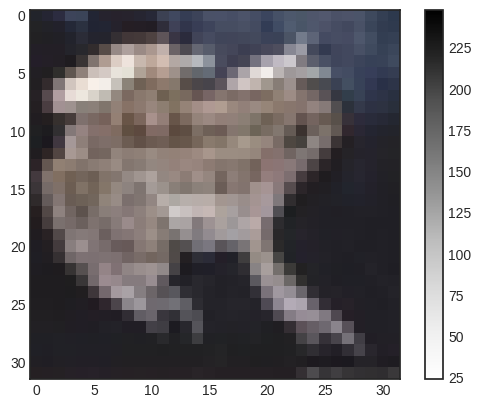

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train_flat = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val_flat = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test_flat = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# **모델 구성 및 컴파일**

In [9]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)              

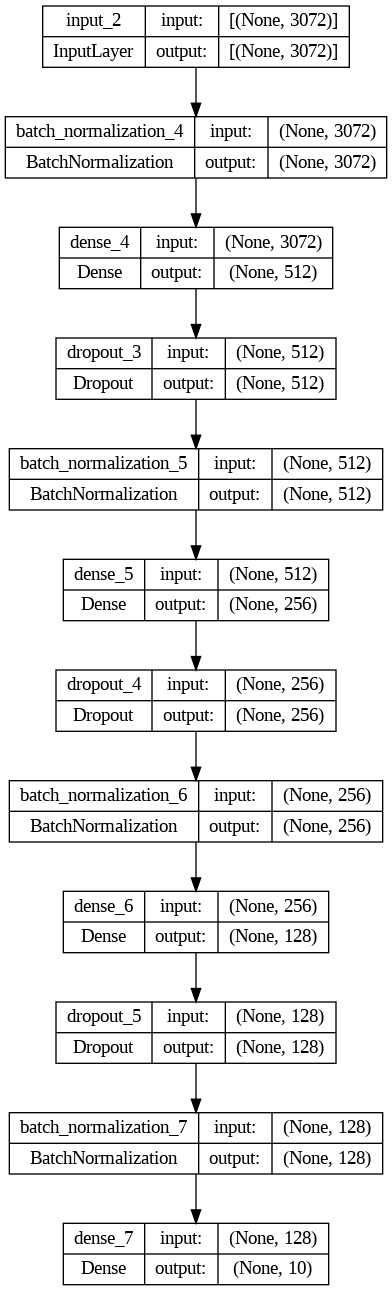

In [14]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

# **모델 학습**

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import callbacks

# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_callback = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_callback = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(
    x_train_flat, y_train,
    epochs=50, batch_size=64,
    validation_data=(x_val_flat, y_val),
    callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/50
625/625 [==============================] - 33s 49ms/step - loss: 1.9882 - accuracy: 0.3013 - val_loss: 1.6447 - val_accuracy: 0.4071
Epoch 2/50
625/625 [==============================] - 27s 43ms/step - loss: 1.7265 - accuracy: 0.3800 - val_loss: 1.5529 - val_accuracy: 0.4495
Epoch 3/50
625/625 [==============================] - 27s 43ms/step - loss: 1.6335 - accuracy: 0.4182 - val_loss: 1.4926 - val_accuracy: 0.4657
Epoch 4/50
625/625 [==============================] - 26s 42ms/step - loss: 1.5819 - accuracy: 0.4329 - val_loss: 1.4640 - val_accuracy: 0.4741
Epoch 5/50
625/625 [==============================] - 27s 43ms/step - loss: 1.5456 - accuracy: 0.4480 - val_loss: 1.4322 - val_accuracy: 0.4842
Epoch 6/50
625/625 [==============================] - 26s 41ms/step - loss: 1.5075 - accuracy: 0.4622 - val_loss: 1.4090 - val_accuracy: 0.4913
Epoch 7/50
625/625 [==============================] - 27s 43ms/step - loss: 1.4896 - accuracy: 0.4674 - val_loss: 1.3911 - val_accuracy:

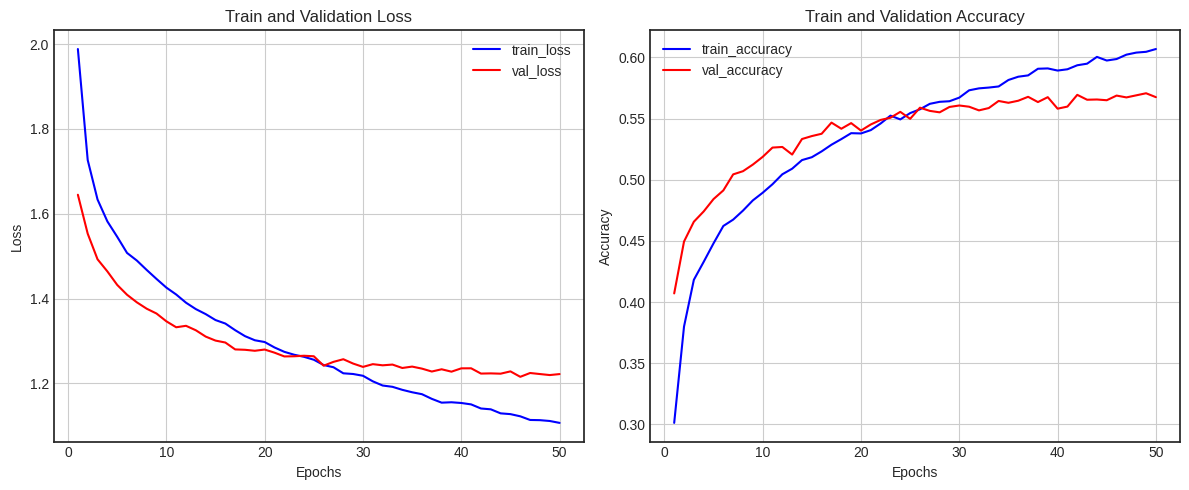

In [18]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.tight_layout()
    plt.show()

show_history(history)

# **모델 평가 및 예측**

In [20]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
x_test_flat = x_test.reshape((x_test.shape[0], 32 * 32 * 3))
test_loss, test_acc = model.evaluate(x_test_flat, y_test)

print("테스트 loss:",test_loss)
print("테스트 정확도:", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 2.6100 - accuracy: 0.1000
테스트 loss: 2.61000657081604
테스트 정확도: 0.10000000149011612
